<a href="https://colab.research.google.com/github/Arun-Kumar-chaine/Mini-project/blob/main/Mini_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bing-image-downloader 

In [2]:
!pip install ipython-autotime
%load_ext autotime

time: 205 µs (started: 2021-05-24 07:15:31 +00:00)


In [3]:
!mkdir images
#Making a directory with name image 

time: 113 ms (started: 2021-05-24 07:15:31 +00:00)


In [4]:
from bing_image_downloader import downloader 
downloader.download("Night sky", limit = 30 , output_dir='images ', adult_filter_off= False)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://wallpapershome.com/images/wallpapers/night-sky-1280x720-5k-4k-wallpaper-8k-stars-night-mountains-nebula-5497.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://wallpapershome.com/images/pages/pic_v/1136.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://wallpapershome.com/images/wallpapers/road-1080x1920-night-forest-sky-4k-20331.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.hdwallpapers.in/download/shanghai_skyscraper_tower_under_sky_hd_travel-1366x768.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://wallpapershome.com/images/wallpapers/bora-bora-2160x3840-5k-4k-wallpaper-french-polynesia-best-beaches-of-633.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://babyshowerideas4u.com/wp-content/uploads/2016/09/Starry-Night-Baby-Shower-Cake-600x800.jpg
[!] Issue getting: https://babyshowerideas4u.com/wp-content/uplo

In [5]:
from bing_image_downloader import downloader
downloader.download("Sun", limit = 30 , output_dir='images ', adult_filter_off= True)



[!!]Indexing page: 1

[%] Indexed 9 Images on Page 1.


[%] Downloading Image #1 from http://www.hdwallpapers.in/download/sunrise_hdr-1920x1200.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.thetreecenter.com/wp-content/uploads/acer-circinatum-pacific-fire-1.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://hative.com/wp-content/uploads/2014/10/no-carve-pumpkin-ideas/4-caramel-apple.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.topdreamer.com/wp-content/uploads/2013/05/Water-Reflection-10.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://image.zmenu.com/menupic/5497773/s_cdc1a56d-57b5-4dad-8dfb-28b94f3ccc3c.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://cdn.shopify.com/s/files/1/2059/7683/articles/Dark_Nights_Metal_5_Francesco_Mattina_Virgin_Variant_Batman_who_Laughs_S_1024x1024.jpg?v=1512859566
[%] File Downloaded !

[%] Downloading Image #7 from https://image.zmenu.com/menupic/2431699/s_4e5a

In [6]:
# Preprocessing Data
#Step 1 - Resizing
#Step 2 - Flatting data

#importing libraries

import os 
import matplotlib.pyplot as plt 
import numpy as np 
from skimage.io import imread 
from skimage.transform import resize  #to resize images 

target = []
images = []
flat_data = []

DATADIR = '/content/images '
CATEGORIES = ['Night sky','Sun']

for category in CATEGORIES:   #To iterate in categories
   class_num = CATEGORIES.index(category)  #Labelling categories for easy access
   path = os.path.join(DATADIR,category)   #creating a path to iterate via images
   for img in os.listdir(path):
     img_array = imread(os.path.join(path,img))  #reading images
     img_resized = resize(img_array,(150,150,3)) #resizing images
     flat_data.append(img_resized.flatten())     #flattening images
     images.append(img_resized)
     target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)


time: 34.3 s (started: 2021-05-24 07:17:09 +00:00)


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 1min 36s (started: 2021-05-24 07:17:43 +00:00)


In [8]:
#Splitting Data into training and testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)



time: 162 ms (started: 2021-05-24 07:19:20 +00:00)


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              { 'C':[1,10,100,1000], 'kernel':['linear']},
              { 'C':[1,10,100,1000], 'gamma':[0.001,0.0001],'kernel':['rbf']},

]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 36.6 s (started: 2021-05-24 07:19:20 +00:00)


In [10]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

time: 74.4 ms (started: 2021-05-24 07:19:56 +00:00)


In [11]:
y_test

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

time: 4.42 ms (started: 2021-05-24 07:19:56 +00:00)


In [12]:
from sklearn.metrics import accuracy_score , confusion_matrix
accuracy_score(y_pred,y_test)

#Accuracy 


0.6666666666666666

time: 6.62 ms (started: 2021-05-24 07:19:56 +00:00)


In [13]:
confusion_matrix(y_pred,y_test)

array([[5, 0],
       [6, 7]])

time: 13.7 ms (started: 2021-05-24 07:19:57 +00:00)


In [14]:
import pickle
pickle.dump(clf,open('img_model.p', 'wb'))

time: 30.8 ms (started: 2021-05-24 07:19:57 +00:00)


In [15]:
model = pickle.load(open('img_model.p','rb'))

time: 13.3 ms (started: 2021-05-24 07:19:57 +00:00)


Enter your URLhttps://images.unsplash.com/photo-1535531084957-2f543cbce217?ixid=MnwxMjA3fDB8MHxzZWFyY2h8MXx8Ymx1ZSUyMG5pZ2h0JTIwc2t5fGVufDB8fDB8fA%3D%3D&ixlib=rb-1.2.1&w=1000&q=80
(1500, 1000, 3)
Predicted Output:Night sky


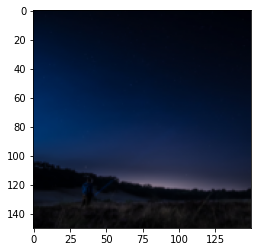

time: 1min 28s (started: 2021-05-24 07:19:57 +00:00)


In [16]:
#Testing with an image
flat_data = []
url = input("Enter your URL")
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'Predicted Output:{y_out}')